# Lab 3: [Protein chain clustering](https://chalmers.instructure.com/courses/10918/files/918897/download?wrap=1)
* Daniel Willim:
* Erik Jergéus: 

## 1 Show the distribution of phi and psi combinations using: 

### a. A scatter plot

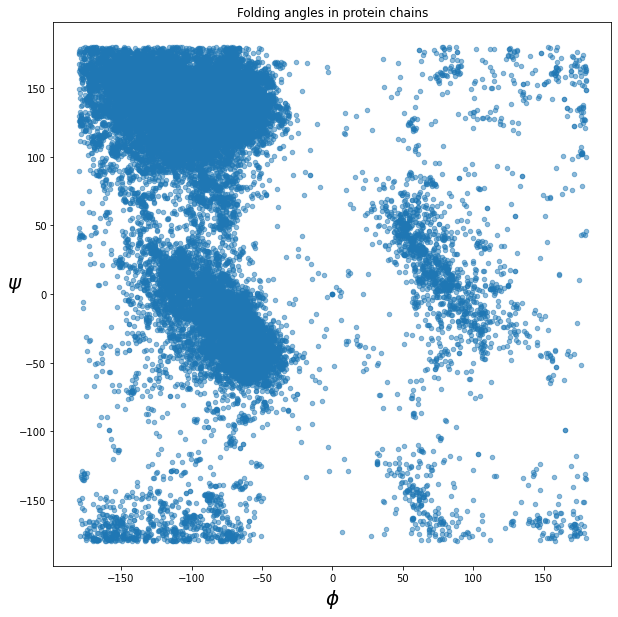

In [153]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [10, 10]

data = pd.read_csv("data_all.csv")
data.plot.scatter(x="phi", y="psi", alpha = 0.5)
plt.title("Folding angles in protein chains")
plt.ylabel(r"$\psi$", rotation="horizontal", size=20)
plt.xlabel(r"$\phi$", size=20)
plt.show()

### b. A heatmap

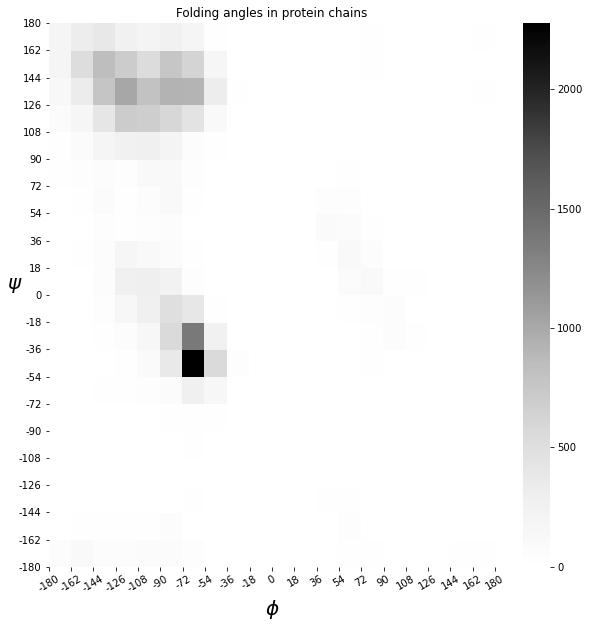

In [27]:
import numpy as np

# Set resolution of heatmap
buckets = 20

# Calulate intermiate variables
step = int(360/buckets)
breakpoints = range(-180,181,step)
breakpoints_array = [*breakpoints]
hmap = np.zeros((buckets, buckets))

# Calulate nr of points per pixel in heatmap
for i, row in data.iterrows():
    hmap[int((row.psi + 180)/step),int((row.phi + 180)/step)] += 1

# Plot heatmap    
sns.heatmap(hmap,cmap="Greys")

#Configure plot
plt.gca().invert_yaxis()
plt.xticks(range(0,buckets + 1), labels=breakpoints_array, 
           rotation=30)
plt.yticks(range(0,buckets + 1), labels=breakpoints_array, 
           rotation="horizontal")

plt.title("Folding angles in protein chains")
plt.ylabel(r"$\psi$", rotation="horizontal", size=20)
plt.xlabel(r"$\phi$", size=20)

plt.show()

## 2 Use  the  K-means  clustering  method to  cluster  the phi  and  psi  angle  combinations  in the data file. 

### a. Experiment with different values of K. Suggest an appropriate value of K for this task and motivate this choice. 

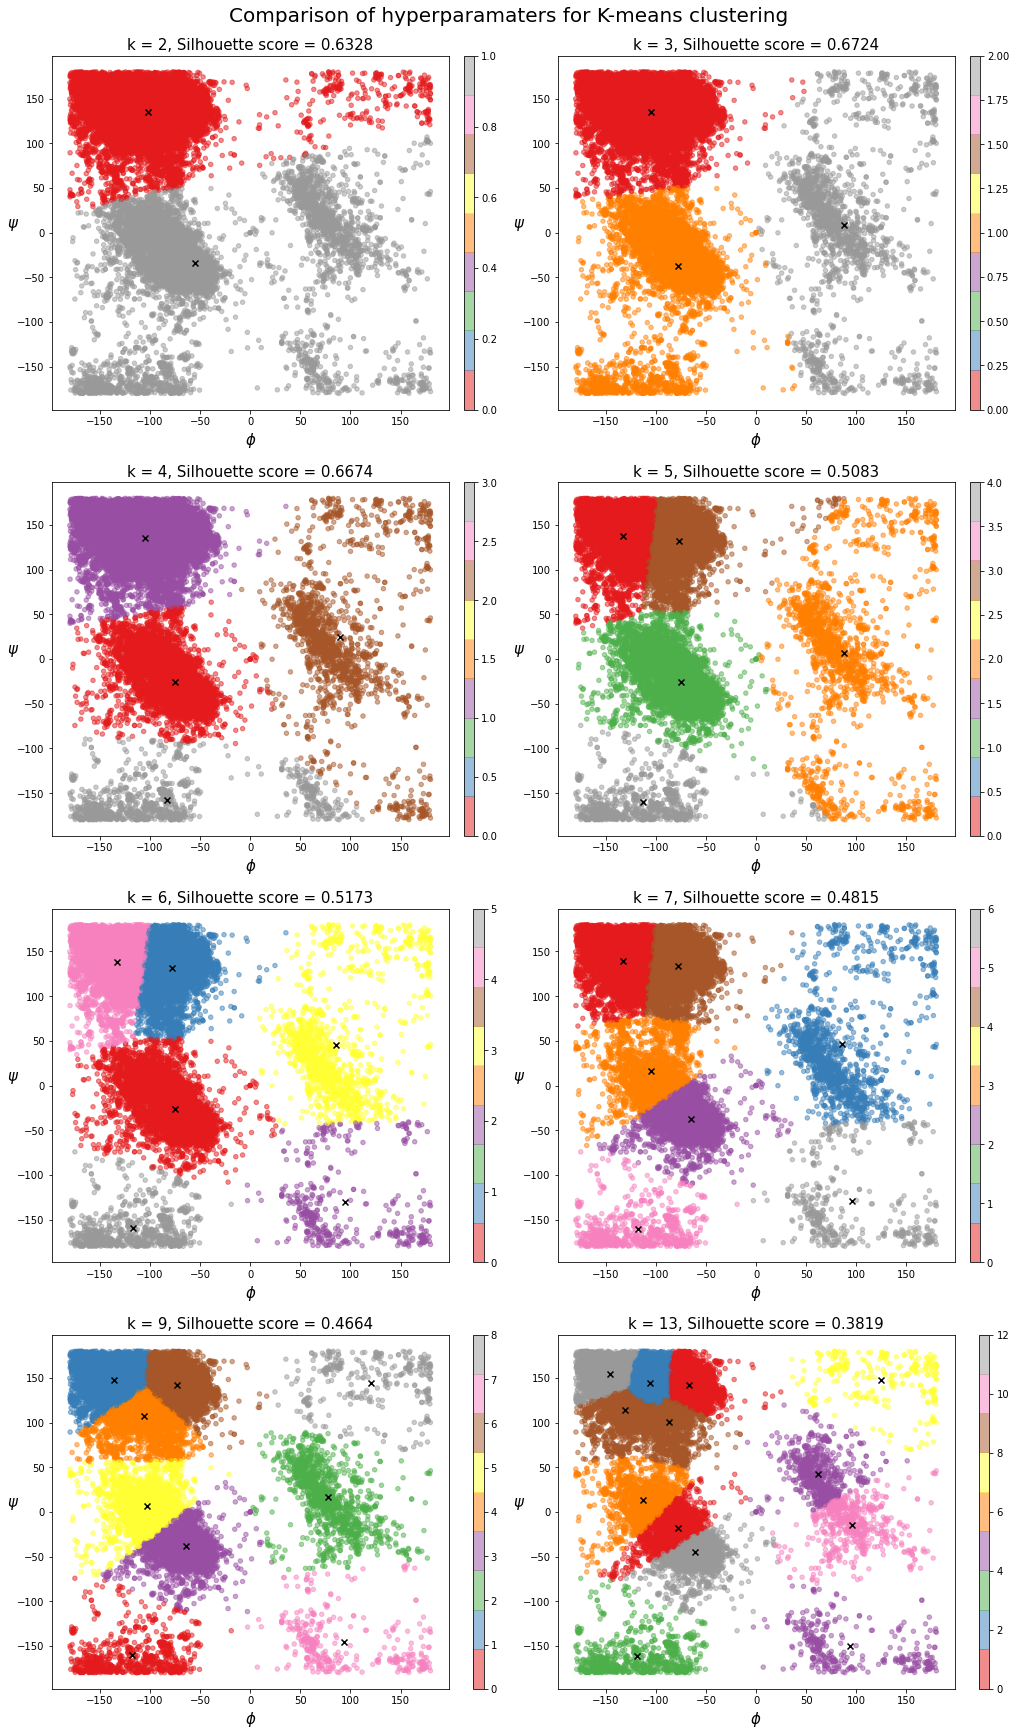

In [152]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Set k values to test
ks = [2,3,4,5,6,7,9,13]

# Setup plt subfigures to hold each scatterplot
fig,axs = plt.subplots(int(len(ks)/2),2, figsize=(2*7, int(len(ks)/2)*6),
                       constrained_layout=True)
axs = axs.flatten()

# Run KMeans for each k in ks, then plot the result
for i,k in enumerate(ks):
    kmeans = KMeans(n_clusters=k).fit(data[["phi", "psi"]])
    clusters = kmeans.cluster_centers_
        
    data.plot.scatter(x="phi", y="psi", alpha = 0.5, ax=axs[i], c=kmeans.labels_, cmap="Set1")
    axs[i].scatter(x=clusters[:,0], y=clusters[:,1], c="Black", marker='x')
    
    axs[i].set_title(f"k = {k}, Silhouette score = {silhouette_score(data[['phi', 'psi']], kmeans.labels_):,.4f}"
                    ,size=15)
    axs[i].set_ylabel(r"$\psi$", rotation="horizontal",size=15)
    axs[i].set_xlabel(r"$\phi$",size=15)

# Configure plot
fig.suptitle("Comparison of hyperparamaters for K-means clustering", size=20)
plt.show()

Testar olika k, väljer den som har bäst siluette score -> k=3, stämmer överens med heatmap 


### b.Validate the clusters that are found with the chosen value of K. Hint: See the slides for Lecture 6, Section Validating clustering. 

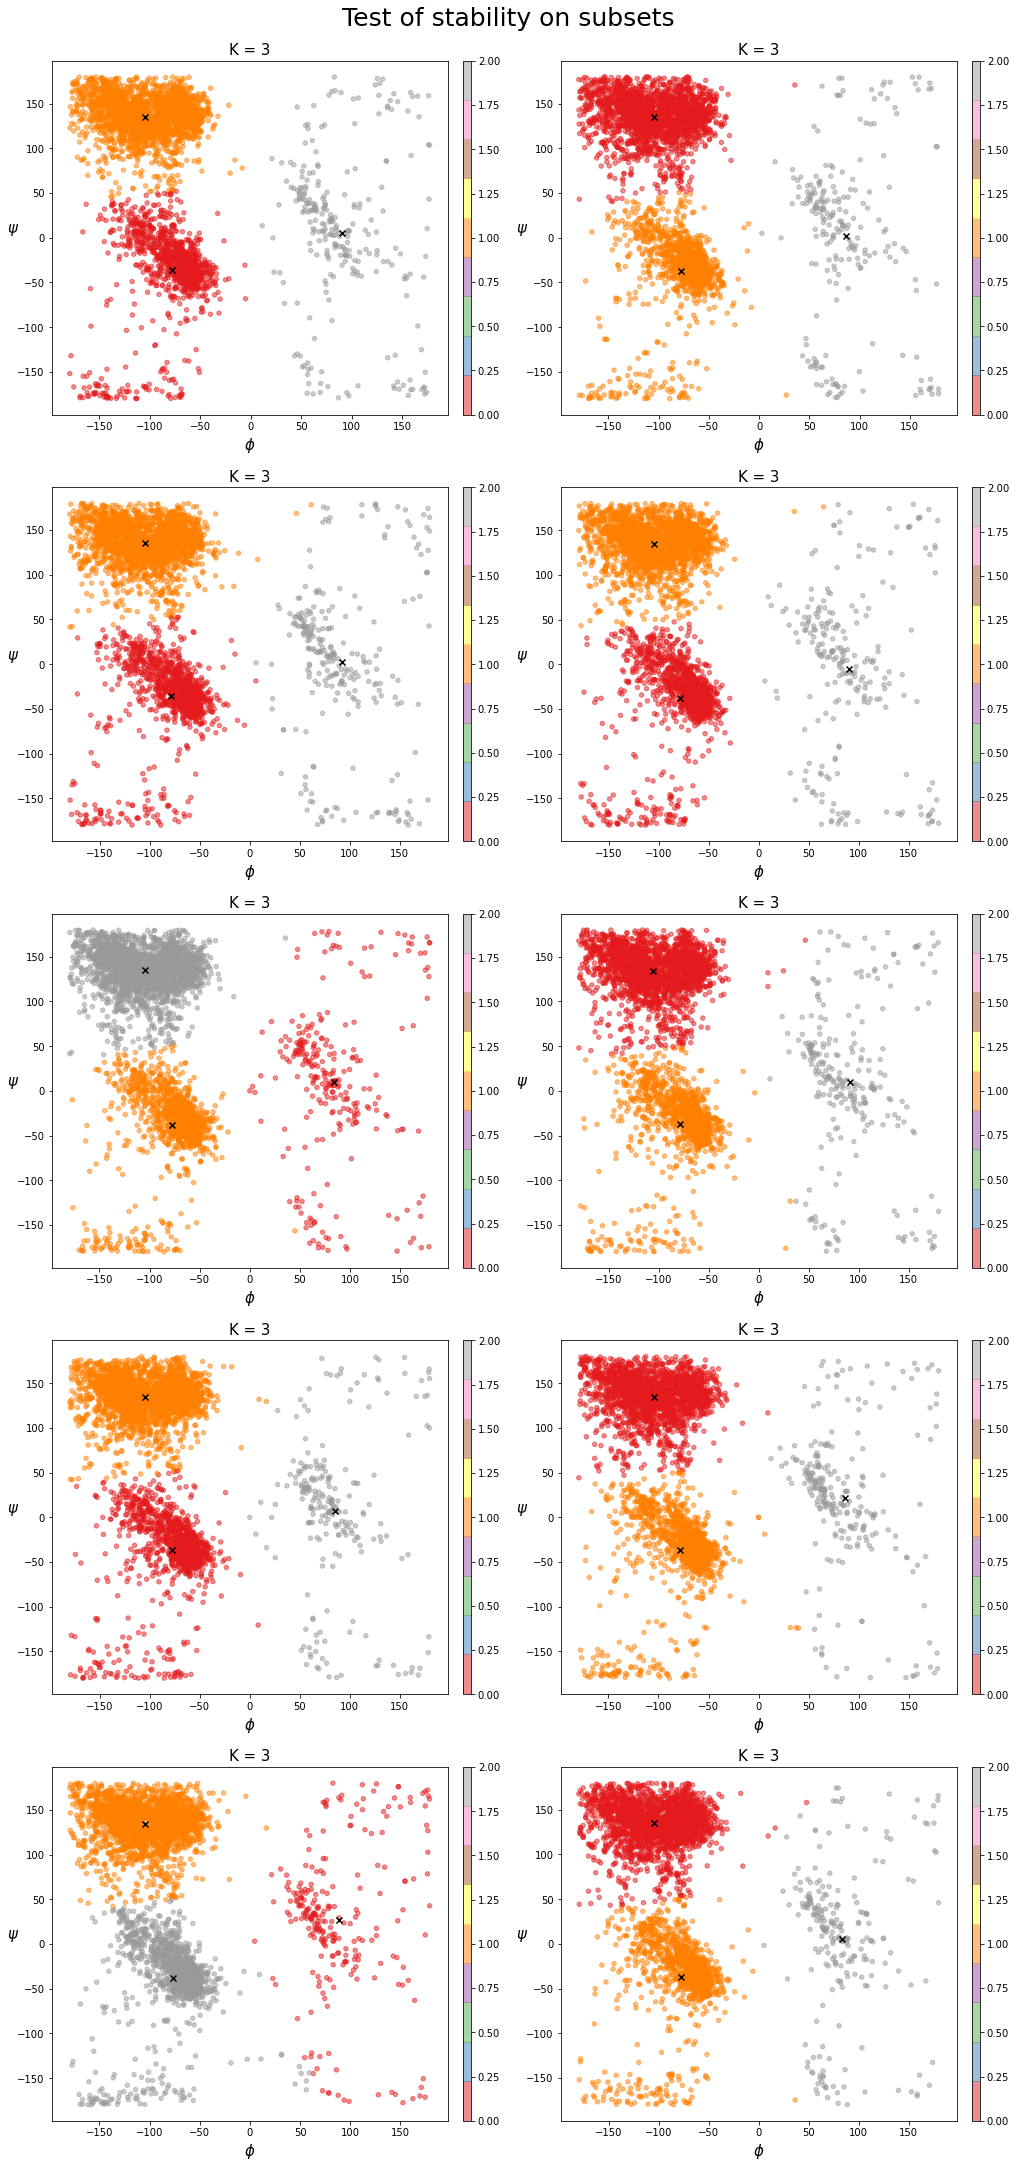

In [150]:
# Set params from test
k = 3
iterations = 10
frac = 1/8

# Create subplots for each 
fig,axs = plt.subplots(int(iterations/2),2,constrained_layout=True,
                       figsize=(2*7, int(iterations/2)*6))
axs = axs.flatten()

# Plot each test
for i in range(iterations):
    # Sample data
    sample = data.sample(frac=frac)
    sampleNumbers = sample[['phi','psi']].copy()
    
    # Run kmeans
    kmeans = KMeans(n_clusters=k).fit(sampleNumbers)
    
    # Plot result
    sample.plot.scatter(x="phi", y="psi", alpha = 0.5, ax=axs[i], c=kmeans.labels_, cmap="Set1")
    axs[i].scatter(x=kmeans.cluster_centers_[:,0], y=kmeans.cluster_centers_[:,1], c="Black", marker="x")
    axs[i].set_title(f"K = {k}", size=15)
    axs[i].set_ylabel(r"$\psi$", rotation="horizontal", size=15)
    axs[i].set_xlabel(r"$\phi$", size=15)

# Configure plot
fig.suptitle("Test of stability on subsets", size=25)
plt.show()

Väldigt stabilt, sker stor förändring på 1/8 av datan 

Eventuellt, räkna ut co-occurrence 

### c.Do the clusters found in part (a) seem reasonable? 

Yes, matches both heatmap and scatterplot
Och informationen från internett vilket kluster som "borde" finnas

### d. Can you change the data to get better results (or the same results in a simpler way)?  (Hint:  since  both  phi  and  psi  are  periodic  attributes,  you  can  think  of shifting/translating them by some value and then use the modulo operation.) 

Translatera/shifta upp så att clustret längst ner till vänster faktiskt hamnar uppe på det högst upp till vänster etc. -> lägger axlarna där det finns färst punkter

Hittar samma kluster men sil score bättre

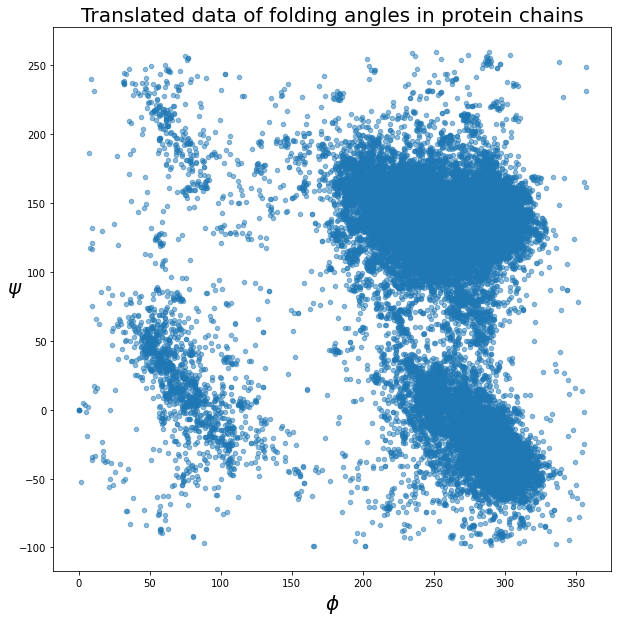

In [155]:
translated = data.copy()

# Translate psi
array = translated.psi.to_numpy()

for i,x in enumerate(array):
    if x < -100:
        array[i] = x + 360
        
translated['psi']= pd.Series(array)

# Translate phi
array = translated.phi.to_numpy()

for i,x in enumerate(array):
    if x < 0:
        array[i] = x + 360

translated['phi']= pd.Series(array)

# Plot translated data
translated.plot.scatter(x="phi", y="psi", alpha = 0.5)

# Configure plot
plt.title("Translated data of folding angles in protein chains", size=20)
plt.ylabel(r"$\psi$", rotation="horizontal", size=20)
plt.xlabel(r"$\phi$", size=20)

plt.show()

# TODO fix axis labels 

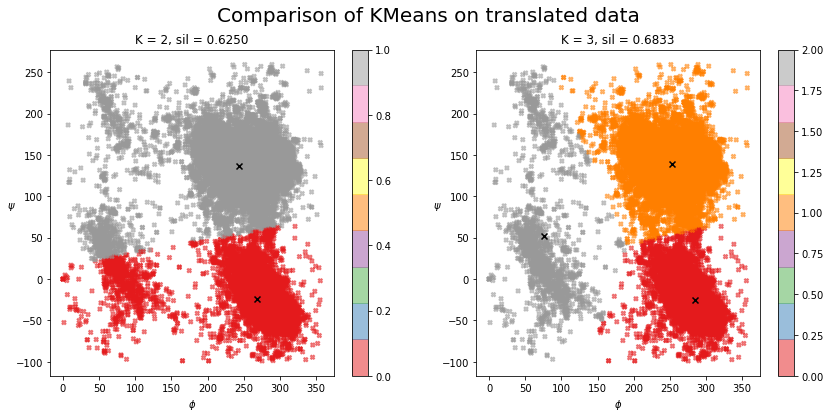

In [156]:
# KMeans to test data on
ks = [2,3,4,5,6,7,9,13]

# Setup subplots
fig,axs = plt.subplots(int(len(ks)/2),2, figsize=(2*7, int(len(ks)/2)*6),
                       constrained_layout=True)
axs = axs.flatten()


for i,k in enumerate(ks):
    kmeans = KMeans(n_clusters=k).fit(translated[['phi', 'psi']])
    clusters = kmeans.cluster_centers_
    
    translated.plot.scatter(x="phi", y="psi", alpha = 0.5, ax=axs[i], 
                            c=kmeans.labels_, cmap="Set1", marker='X')
    
    axs[i].set_title(f"K = {k}, sil = {silhouette_score(translated[['phi', 'psi']], kmeans.labels_):,.4f}")
    axs[i].scatter(x=clusters[:,0], y=clusters[:,1], c="Black", marker="x")
    axs[i].set_ylabel(r"$\psi$", rotation="horizontal")
    axs[i].set_xlabel(r"$\phi$")

fig.suptitle("Comparison of KMeans on translated data", size=20)
plt.show()

## 3. Use the DBSCAN method to cluster the phi and psi angle combinations in the data file.

### a. Motivate: 
#### i. the  choice  of the  minimum number  of  samples in  the neighbourhood for a point to be considered as a core point, and 
#### ii.the  choice  of the  maximum distance between two  samples  belonging to the same neighbourhood (“eps” or “epsilon”)

### b. Highlight  the  clusters  found  using  DBSCAN  and  any  outliers  in  a  scatter  plot. How  many  outliers  are  found?  Plot  a  bar  chart  to  show  which  amino  acid residue types are most frequently outliers

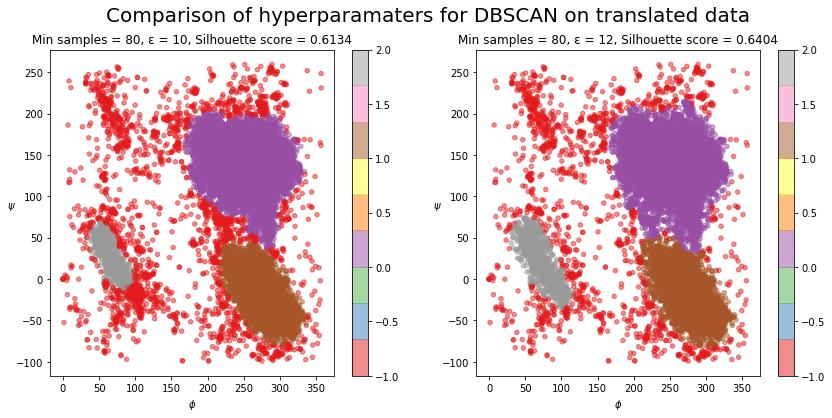

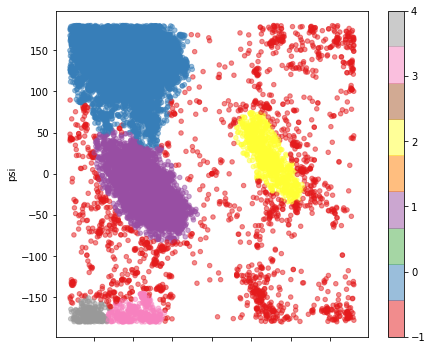

In [61]:
from sklearn.cluster import DBSCAN

testParams = [(10,80),(12,80)]

# Configure Subplots
fig,axs = plt.subplots(int(len(testParams)/2),2,
                       figsize=(2*7, int(len(testParams)/2)*6),
                       constrained_layout=True)
axs = axs.flatten()

# Translated data
for i, x in enumerate(testParams):
    dbcluster = DBSCAN(eps=x[0], min_samples=x[1]).fit(translated[['phi','psi']])
    translated.plot.scatter(x="phi", y="psi", alpha = 0.5, c=dbcluster.labels_, cmap="Set1", ax=axs[i])
    axs[i].set_title(f"Min samples = {x[1]}, ε = {x[0]}, Silhouette score = {silhouette_score(translated[['phi','psi']], dbcluster.labels_):,.4f}")
    axs[i].set_ylabel(r"$\psi$", rotation="horizontal")
    axs[i].set_xlabel(r"$\phi$")
    
fig.suptitle("Comparison of hyperparamaters for DBSCAN on translated data", size=20)
plt.show()
    
#Org data - TODO
plt.rcParams['figure.figsize'] = [7,6]
dbcluster = DBSCAN(eps=12, min_samples=80).fit(data[['phi','psi']])
data.plot.scatter(x="phi", y="psi", alpha = 0.5, c=dbcluster.labels_, cmap="Set1")
plt.show()

Nr of outliers in plot 1582


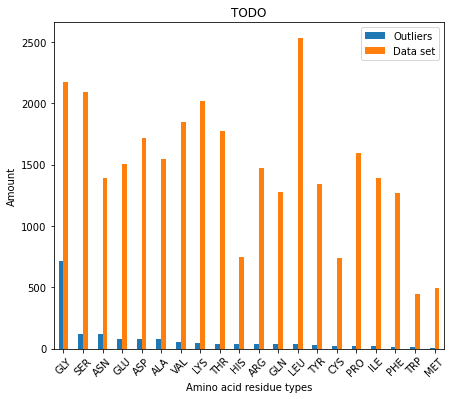

In [68]:
# TODO run dbscan with choosen hyper paramaters
dbcluster = DBSCAN(eps=12, min_samples=80).fit(translated[['phi','psi']])

# Filter outliers
translated["label"] = dbcluster.labels_
transOutlires = translated[translated.label==-1]

print(f"Nr of outliers in plot {transOutlires.phi.count()}")

# Count 
countRes = transOutlires["residue name"].value_counts().to_frame()
org = data["residue name"].value_counts().to_frame()

# Merge dataframes
countRes = countRes.merge(org, left_index=True, right_index=True)
countRes.columns = ["Outliers", "Data set"]

# Plot data
countRes.plot.bar()
plt.xticks(rotation=45)
plt.xlabel("Amino acid residue types")
plt.ylabel("Amount")
plt.title("TODO")
plt.show()

### c. Compare the clusters found by DBSCAN with those found using K-means

finds fewer clusters. Doesn't split clusters as much

### d. Discuss whether the clusters found using DBSCAN are robust to small changes in  the  minimum  number  of  samples  in  the  neighbourhood  for  a  point  to  be considered  as  a  core  point,  and/or  the  choice  of  the  maximum  distance between   two   samples   belonging   to   the   same   neighbourhood   (“eps”   or “epsilon”)

It's volatile

## 4. The data file can be stratified by amino acid residue type.  

### a. Use  DBSCAN to cluster the data that have residue type  PRO. Investigate how the clusters found for amino acid residues of type PRO differ from the general clusters (i.e., the clusters that you get from DBSCAN with mixed residue types in question 3).

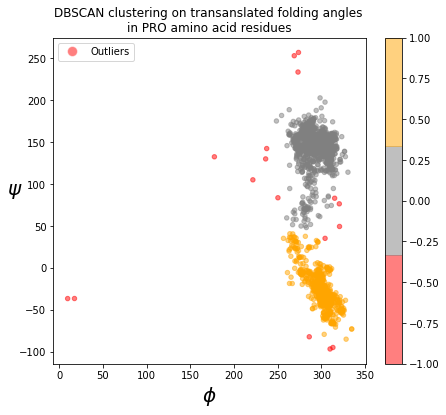

In [133]:
from matplotlib import colors
from matplotlib.lines import Line2D

# Filter data and run dbscan
proData = translated[translated["residue name"] == "PRO"]
dbcluster2 = DBSCAN(eps=20, min_samples=40).fit(proData[['phi','psi']])

# Plot data
plt.rcParams['figure.figsize'] = [7,6]
fig, ax = plt.subplots()

proData.plot.scatter(x="phi", y="psi", alpha = 0.5, ax=ax,
                     c=dbcluster2.labels_, cmap=colors.ListedColormap(['red','grey','orange']))

# Configure plot   
plt.legend(handles=[Line2D([0], [0], marker='o', color='w', label='Outliers',
                          markerfacecolor='red', markersize=10, alpha=0.5)])
plt.title("DBSCAN clustering on transanslated folding angles \nin PRO amino acid residues")
plt.ylabel(r"$\psi$", rotation="horizontal", size=20)
plt.xlabel(r"$\phi$", size=20)
plt.show()

### b. Now use DBSCAN to cluster the data that have residue type GLY. Investigate how the clusters found for amino acid residues of type GLY differ from the general clusters. 


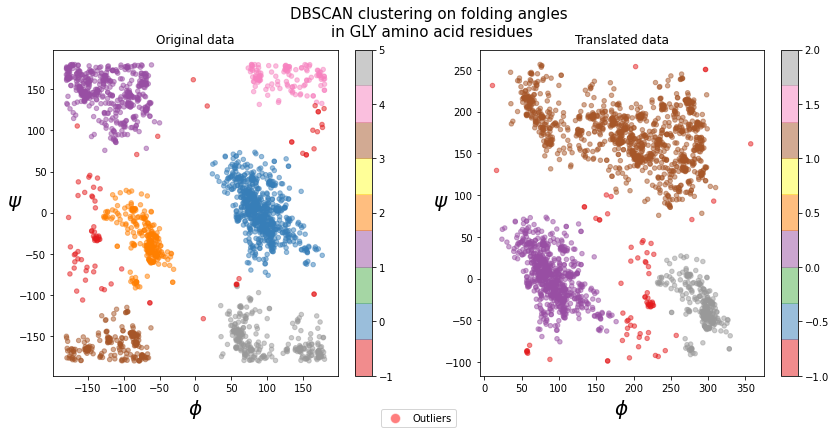

In [131]:
# Prepare subplots
plt.rcParams['figure.figsize'] = [14,6]
fig, axs = plt.subplots(1,2)

# Filter data and run dbscan on translated data
glyTransData = translated[translated["residue name"] == "GLY"]
dbcluster3 = DBSCAN(eps=25, min_samples=30).fit(glyTransData[['phi','psi']])

glyTransData.plot.scatter(x="phi", y="psi", alpha = 0.5, 
                          c=dbcluster3.labels_, cmap="Set1", ax=axs[1])

# Configure plot   
axs[1].set_title("Translated data")
axs[1].set_ylabel(r"$\psi$", rotation="horizontal", size=20)
axs[1].set_xlabel(r"$\phi$", size=20)

# Filter data and run dbscan on original data
glyData = data[data["residue name"] == "GLY"]
dbcluster3 = DBSCAN(eps=25, min_samples=30).fit(glyData[['phi','psi']])

glyData.plot.scatter(x="phi", y="psi", alpha = 0.5, 
                     c=dbcluster3.labels_, cmap="Set1", ax=axs[0])

# Configure plot    
axs[0].set_title("Original data")
axs[0].set_ylabel(r"$\psi$", rotation="horizontal", size=20)
axs[0].set_xlabel(r"$\phi$", size=20)

# Configure figure
fig.legend(loc="lower center", handles=
           [Line2D([0], [0], marker='o', color='w', label='Outliers', 
                   markerfacecolor='red', markersize=10, alpha=0.5)])
fig.suptitle("DBSCAN clustering on folding angles \nin GLY amino acid residues", 
             size=15)
plt.show()